<h1>Natural Language Processing</h1>

Natural-language processing (<strong>NLP</strong>) (obrada prirodnog jezika) je disciplina u računarstvu koja se bavi interakcijom računala i prirodnog (ljudskog) jezika i načinom kako računalo može procesuirati velike količine teksta. Pojam <i>prirodan</i> odnosi se na jezik kojim ljudi govore, npr. engleski, hrvatski, kineski, itd.  Koristit ćemo <a href="https://www.nltk.org/">NLTK</a> modul i obraditi ćemo neke osnovne nltk komponente.  

Jedan primjer literature:

In [9]:
from IPython.display import Image
Image(url='http://covers.oreilly.com/images/9780596516499/cat.gif')

In [10]:
#import nltk modula
import nltk

In [14]:
#prvo ćemo downloadati sve potrebne komponente 
#da bi mogli pravilno koristiti komponente
#anaconda dolazi sa "bundled" nltk modulom,
#ali kroz GUI koji nam se otvori na komandu download
#možemo instalirati i neke dodatne stvari


#nltk.download()

<h3>Osnovni pojmovi</h3>

<ul>
    <li><strong>Tokenization</strong>(word or sentence) - jedan od početnih koraka u NLP procesu, korak koji rastavljamo dugačke stringove teksta u manje dijelove - tokene</li>
    <li><strong>Stop words</strong> - česte riječi u jeziku koje nam nisu pretjerano korisne za daljnji processing</li>
    <li><strong>Stemming</strong> - 'stemeri' izbacuju prefikse ili postfikse iz riječi i ostavljaju samo osnovu riječi
    <li><strong>Corpora</strong> - odnosi se na kolekciju teksta ili tijelo koji imaju neko zajedničko svojstvo, na primjer: Engleski jezik</li>
    <li><strong>Lexicon</strong> - riječi i njihova značenja, riječnik</li>
    
</ul>

<h3>Tokenization</h3>

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [16]:
primjer = "Ovo je prva zadaća iz kolegija Matematički Softver."
print(sent_tokenize(primjer))

['Ovo je prva zadaća iz kolegija Matematički Softver.']


In [18]:
rijeci = word_tokenize(primjer)
print(rijeci)

['Ovo', 'je', 'prva', 'zadaća', 'iz', 'kolegija', 'Matematički', 'Softver', '.']


In [20]:
for rijec in rijeci:
    print(rijec)

Ovo
je
prva
zadaća
iz
kolegija
Matematički
Softver
.


U nastavku ćemo koristiti engleski jezik u primjerima jer jer NLTK najbolje podržan za engleski jezik.

<h3>Filtriranje teksta korištenjem 'stop-words'</h3>

In [22]:
from nltk.corpus import stopwords

#učitamo stop-words na engleskom jeziku u obliku seta
stop = set(stopwords.words("english"))
print(stop)

{'will', 'weren', 'whom', 'above', 'himself', 'out', 'all', 'not', 'yourselves', 'just', 'on', 'in', 'its', 'ain', 'but', 'does', 'during', "couldn't", 'because', "that'll", "you'll", 'these', 'more', 'off', "haven't", 'doesn', 'theirs', 'any', "you've", 'too', 're', 'until', 'they', 'when', 'should', 'why', 'this', 'own', 'ours', 'further', 'at', 'isn', 'now', 'did', 've', 'from', 'his', "didn't", 'do', 'you', 'be', 'were', "doesn't", "you'd", 'some', "wasn't", 'wasn', 'been', 'each', 'hers', 'while', "shouldn't", 'won', 'm', "should've", 'mustn', 'than', "it's", 'then', 'who', 'him', 'few', "isn't", 'she', 'into', 'me', 'needn', 'shouldn', 'those', 'll', 'can', 't', 'ma', 'an', 'ourselves', 'hasn', "shan't", 'no', 'such', 'that', 'and', 'myself', 'has', 'o', 'what', 'over', 'under', 'don', "don't", 'about', 'my', 'is', "needn't", 'wouldn', 'd', 'was', 'had', 'of', 'yours', 'your', 'very', 'being', 'other', 'with', 'haven', 'again', 'for', 'before', 'by', 'down', 'after', 'so', 'havin

In [23]:
recenica = "OK, I'll be back in about an hour. If you think of anything else you need, give me a call."
rijeci = word_tokenize(recenica)
nove = []

for r in rijeci:
    if r not in stop:
        nove.append(r)
print(nove)

['OK', ',', 'I', "'ll", 'back', 'hour', '.', 'If', 'think', 'anything', 'else', 'need', ',', 'give', 'call', '.']


<h3>Stemming</h3>

In [41]:
#Primjer:
rijeci = ["program", "programming", "programmatically"]

from nltk.stem import PorterStemmer
ps = PorterStemmer()

for r in rijeci:
    print(ps.stem(r))

program
program
programmat


In [67]:
#koristimo PorterStemmer
def ukloni_ne_slova(recenica):
    import re
    regex = re.compile('[^a-zA-Z]')
    recenica = regex.sub(' ', recenica)
    return recenica

def ukloni_stops(rijeci):
    from nltk.corpus import stopwords
    stop = set(stopwords.words("english"))
    
    nove = []
    for r in rijeci:
        if r not in stop:
            nove.append(r)
        
    return nove    
    

def pocisti(recenica, ukloni_stop_words=True):
    #izbaci ne-slova
    recenica = ukloni_ne_slova(recenica)
    from nltk.tokenize import word_tokenize
    
    rijeci = word_tokenize(recenica.lower())
    
    from nltk.stem import PorterStemmer
    
    stem = PorterStemmer()
    
    rijeci_a = list(map(stem.stem, rijeci))
    
    #makni stop_words ako treba
    
    if ukloni_stop_words:
        rijeci_a = ukloni_stops(rijeci_a)
        
    return ' '.join(rijeci_a)
    

recenica = "Each year, there’s considerable debate about which finalists should be inducted into the Naismith Memorial Basketball Hall of Fame. The NBA doesn’t have its own Hall, so a basketball player’s entire body of work – from their collegiate success to pro achievements to overseas play – must be factored in when debating whether their bust belongs in Springfield.At first glance, Chris Bosh may not seem like an obvious Hall-of-Fame selection. But, in reality, he’s a virtual lock to be inducted when his time comes. A player must be retired for five years before becoming eligible to enter the Hall of Fame, and Bosh shouldn’t have any trouble getting in (despite what some fans may think).Bosh finds his Hall of Fame candidacy questioned for very different reasons than most players. While some fans (unfairly) mocked him or downplayed his production when he was sharing the court with LeBron James and Dwyane Wade, Bosh’s public perception isn’t the issue."

nova = pocisti(recenica, True)

print(nova)

year consider debat finalist induct naismith memori basketbal hall fame nba hall basketbal player entir bodi work collegi success pro achiev oversea play must factor debat whether bust belong springfield first glanc chri bosh may seem like obviou hall fame select realiti virtual lock induct hi time come player must retir five year befor becom elig enter hall fame bosh ani troubl get despit fan may think bosh find hi hall fame candidaci question veri differ reason player fan unfairli mock downplay hi product wa share court lebron jame dwyan wade bosh public percept issu


<h3>Učitavanje predefiniranih primjera</h3>

In [49]:
#nltk modul dolazi sa mnogo primjera teksta kroz corpus 
#koje ćemo koristiti u primjerima
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [50]:
#uzimamo shakespeareov Hamlet kao primjer
hamlet = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

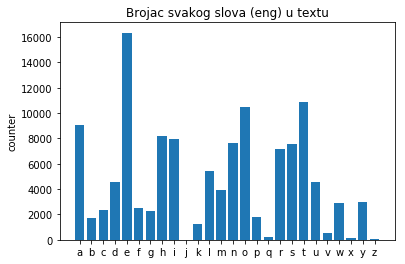

In [76]:
import collections
import matplotlib.pyplot as plt
import numpy as np

#print(letterCnt)

#ispisujemo brojac svakog slova kao barchart
def nacrtaj_brojac(tekst):
    letterCnt = collections.Counter(ukloni_ne_slova(tekst.lower()))
    letters = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k','l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z')
    y = np.arange(len(letters))
    
    results = [];
    for l in letters:
        results.append(letterCnt[l])

    plt.bar(y, results, align='center')
    plt.xticks(y, letters)
    plt.ylabel('counter')
    plt.title('Brojac svakog slova (eng) u textu')

    plt.show()
    

nacrtaj_brojac(hamlet)


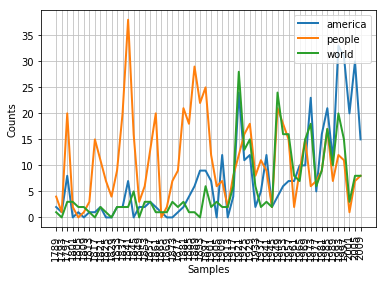

In [90]:
from nltk.corpus import inaugural
def plot_starts_with(targets):
    cfd = nltk.ConditionalFreqDist((target, fileid[:4])
    for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
            for target in targets
                if w.lower().startswith(target))
    cfd.plot()
   
#graf kroz vrijeme koji čita sve inauguralne govore gleda početne riječi
plot_starts_with(['world', 'people', 'america'])

<h3>Chunking</h3>

In [102]:
recenica = inaugural.raw('1789-Washington.txt')
recenica = recenica[:100]
tokeni = sent_tokenize(recenica)
#tagiranje rijeci
for tkn in tokeni:
    rijeci = word_tokenize(tkn)
    tag = nltk.pos_tag(rijeci)
    print(tag)


[('Fellow-Citizens', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Senate', 'NNP'), ('and', 'CC'), ('of', 'IN'), ('the', 'DT'), ('House', 'NNP'), ('of', 'IN'), ('Representatives', 'NNPS'), (':', ':'), ('Among', 'IN'), ('the', 'DT'), ('vicissitudes', 'NNS'), ('incident', 'NN')]


In [109]:
recenica = inaugural.raw('1789-Washington.txt')
recenica = recenica[:100]
tokeni = sent_tokenize(recenica)
#tagiranje rijeci
#trazimo chunkove po predefiniranim tagovima
for tkn in tokeni:
    rijeci = word_tokenize(tkn)
    tag = nltk.pos_tag(rijeci)
    chnk = r"""Chunk: {<RB.?>*<VB,?>*<NNP>+<NN>?}"""
    chprs = nltk.RegexpParser(chnk)
    c = chprs.parse(tag)
    c.draw()

<h3>Lemmatization</h3>
<p>Sličan proces 'stemming'-u samo rezultat je prava riječ.</p>

In [111]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
print(lemma.lemmatize('cars'))

car


<p>Isti primjer kao gore, samo koristimo 'lemmatize'</p>

In [112]:
def pocisti_lemma(recenica, ukloni_stop_words=True):
    #izbaci ne-slova
    recenica = ukloni_ne_slova(recenica)
    from nltk.tokenize import word_tokenize
    
    rijeci = word_tokenize(recenica.lower())
    
    from nltk.stem import WordNetLemmatizer
    
    lemma = WordNetLemmatizer()
    
    rijeci_a = list(map(lemma.lemmatize, rijeci))
    
    #makni stop_words ako treba
    
    if ukloni_stop_words:
        rijeci_a = ukloni_stops(rijeci_a)
        
    return ' '.join(rijeci_a)
    

recenica = "Each year, there’s considerable debate about which finalists should be inducted into the Naismith Memorial Basketball Hall of Fame. The NBA doesn’t have its own Hall, so a basketball player’s entire body of work – from their collegiate success to pro achievements to overseas play – must be factored in when debating whether their bust belongs in Springfield.At first glance, Chris Bosh may not seem like an obvious Hall-of-Fame selection. But, in reality, he’s a virtual lock to be inducted when his time comes. A player must be retired for five years before becoming eligible to enter the Hall of Fame, and Bosh shouldn’t have any trouble getting in (despite what some fans may think).Bosh finds his Hall of Fame candidacy questioned for very different reasons than most players. While some fans (unfairly) mocked him or downplayed his production when he was sharing the court with LeBron James and Dwyane Wade, Bosh’s public perception isn’t the issue."

nova = pocisti_lemma(recenica, True)

print(nova)

year considerable debate finalist inducted naismith memorial basketball hall fame nba hall basketball player entire body work collegiate success pro achievement overseas play must factored debating whether bust belongs springfield first glance chris bosh may seem like obvious hall fame selection reality virtual lock inducted time come player must retired five year becoming eligible enter hall fame bosh trouble getting despite fan may think bosh find hall fame candidacy questioned different reason player fan unfairly mocked downplayed production wa sharing court lebron james dwyane wade bosh public perception issue


<h3>Text Classification</h3>

In [144]:
from nltk.corpus import names
labels = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
import random as rnd
rnd.shuffle(labels)

#pokušat ćemo kreirati classifier tako što ćemo gledat zadnja slova imena

def feature_last_letter(name):
    return {'l': name[-1]}

sets = [(feature_last_letter(name), gender) for (name, gender) in labels]

#treniramo na prvih 400 imena

trening, test = sets[400:], sets[:400]

cls = nltk.NaiveBayesClassifier.train(trening)


In [145]:
cls.classify(feature_last_letter('Goran'))

'male'

In [146]:
cls.classify(feature_last_letter('Iva'))

'female'

In [147]:
#možemo iskoristiti metodu accuracy koja će nam reći koja je točnost 
#classifiera na test setu

print(nltk.classify.accuracy(cls, test))

0.7925


In [148]:
cls.show_most_informative_features(10)

Most Informative Features
                       l = 'a'            female : male   =     34.7 : 1.0
                       l = 'k'              male : female =     32.6 : 1.0
                       l = 'f'              male : female =     15.9 : 1.0
                       l = 'p'              male : female =     11.8 : 1.0
                       l = 'v'              male : female =     11.2 : 1.0
                       l = 'd'              male : female =     10.1 : 1.0
                       l = 'm'              male : female =      8.9 : 1.0
                       l = 'o'              male : female =      8.3 : 1.0
                       l = 'r'              male : female =      7.1 : 1.0
                       l = 'g'              male : female =      5.6 : 1.0


In [152]:
#Provjerimo kakv rezultat ćemo dobiti ako umjesto zadnjeg
#slova uzmemo zadnja dva slova

def feature_last_2_letters(name):
    return {'l': name[-2:]}

sets = [(feature_last_2_letters(name), gender) for (name, gender) in labels]

#treniramo na prvih 400 imena

trening, test = sets[400:], sets[:400]

cls = nltk.NaiveBayesClassifier.train(trening)

In [153]:
print(nltk.classify.accuracy(cls, test))

0.7975


In [154]:
cls.show_most_informative_features(10)

Most Informative Features
                       l = 'na'           female : male   =    101.6 : 1.0
                       l = 'la'           female : male   =     75.7 : 1.0
                       l = 'us'             male : female =     40.8 : 1.0
                       l = 'ia'           female : male   =     40.7 : 1.0
                       l = 'sa'           female : male   =     35.5 : 1.0
                       l = 'do'             male : female =     27.1 : 1.0
                       l = 'ta'           female : male   =     26.4 : 1.0
                       l = 'ra'           female : male   =     25.7 : 1.0
                       l = 'rd'             male : female =     25.6 : 1.0
                       l = 'ld'             male : female =     22.9 : 1.0


In [156]:
#možemo iskoristiti i drugačiji classifier umjest NaiveBayes
cls = nltk.classify.DecisionTreeClassifier.train(trening)

print(nltk.classify.accuracy(cls, test))

0.8025


In [161]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC, LinearSVC

In [162]:
SVC_cls = SklearnClassifier(SVC())
SVC_cls.train(trening)
print(nltk.classify.accuracy(SVC_cls, test))

0.6575
